# A set of visualization to ensure the correctness of program

In [1]:
from utils.data import *
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [11]:
%qtconsole

### visualize the open, high, low, close of 16 target stocks from 2012-8-13 to 2017-8-11

In [2]:
history, abbreviation = read_stock_history(filepath='utils/datasets/stocks_history_target.h5')
history_T = history.transpose((0, 2, 1))
# create x tick
date_list = [index_to_date(i) for i in range(number_datetime)]
x = range(number_datetime)

In [3]:
print date_list[0], date_list[-1]

2012-08-13 2017-08-11


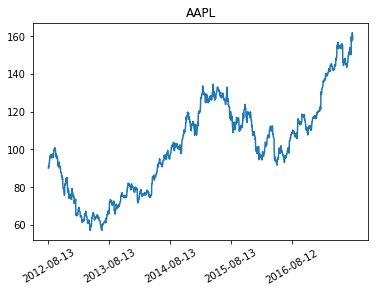

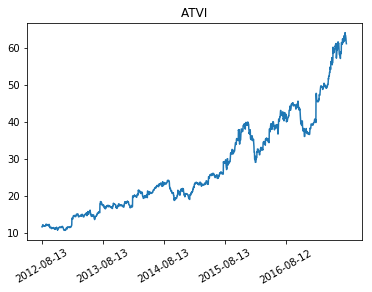

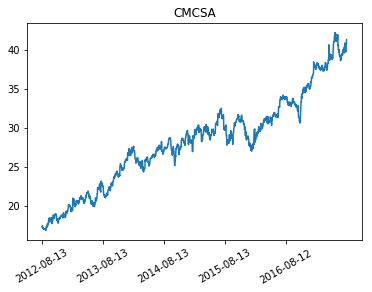

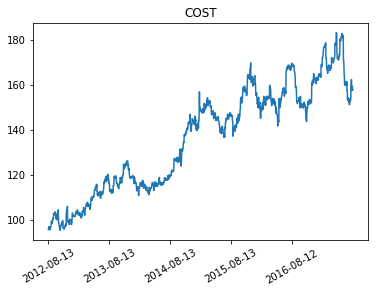

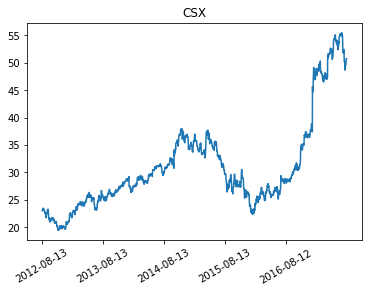

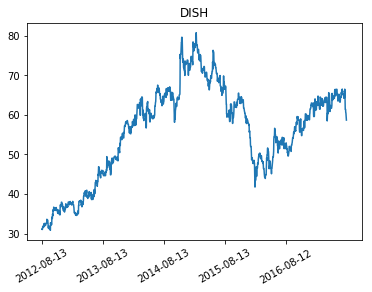

In [4]:
### show 16 stock of open price
for i in range(len(abbreviation) - 10):
    plt.figure(i)
    plt.plot(x, history_T[i][1])  # open, high, low, close = [0, 1, 2, 3]
    plt.xticks(x[::365], date_list[::365], rotation=30)
    plt.title(abbreviation[i])
    plt.show()

### plot a random action chosen on 16 stocks to test the simulator

In [8]:
from environment.portfolio import *

In [9]:
env = PortfolioEnv(history, abbreviation)

In [14]:
reward_lst = [0]
accumulated_reward_lst = [0]
total_reward = 0
for i in range(200):
    action = env.action_space.sample()
    observation, reward, done, info = env._step(action)
    total_reward += reward
    reward_lst.append(reward)
    accumulated_reward_lst.append(total_reward)
    if done:
        break

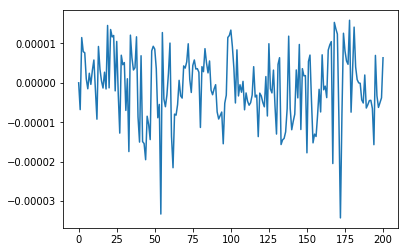

In [15]:
# reward each day
plt.figure()
plt.plot(reward_lst)
plt.show()

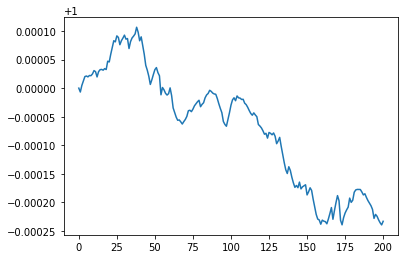

In [16]:
# accumulated reward
profit = [np.exp(x) for x in accumulated_reward_lst]
plt.figure()
plt.plot(profit)
plt.show()

In [17]:
obs = env._reset()

#### We don't make any investment to make sure the profit doesn't change. In reality, there is a $eps$ change from 1 because we introduce $eps$ to avoid zero division.

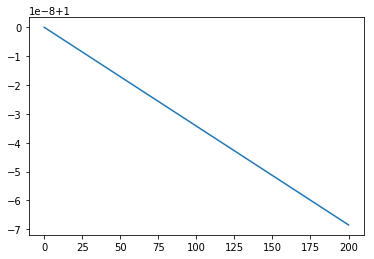

In [19]:
env = PortfolioEnv(history, abbreviation)
accumulated_reward_lst = [0]
total_reward = 0
for i in range(200):
    action = np.array([1.0] + 16 * [0.0])
    observation, reward, done, info = env._step(action)
    total_reward += reward
    accumulated_reward_lst.append(total_reward)
    if done:
        break
profit = [np.exp(x * 1e3) for x in accumulated_reward_lst]
plt.figure()
plt.plot(profit)
plt.show()